HW 3 of Computational methods 540

Review of basic statistics:MVN

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import *

In [115]:
mu3 = np.array([5,1,2])
C = np.random.random((3, 3))
cov3 = C @ C.T # positive semi-definite

In [116]:
print(cov3)

[[0.67998597 0.97837945 0.77553447]
 [0.97837945 1.79920898 1.4297609 ]
 [0.77553447 1.4297609  1.13737097]]


In [117]:
print(f"The trivariate normal distribution mean is {mu3},the covariance matrix : \n{cov3}")

The trivariate normal distribution mean is [5 1 2],the covariance matrix : 
[[0.67998597 0.97837945 0.77553447]
 [0.97837945 1.79920898 1.4297609 ]
 [0.77553447 1.4297609  1.13737097]]


Generate 2000 samples from the distribution ,the random vectors are x1 x2 x3

In [118]:
# eigv3 = np.linalg.eigvals(cov3)
# L = np.linalg.cholesky(cov3)

In [119]:
n = 2000 #2000 samples from x1 x2 x3
data = np.random.multivariate_normal(mu3, cov3, size=n)
x1 = data[:, 0]
x2 = data[:, 1]
x3 = data[:,2]

In [79]:
np.mean(x1),np.mean(x2),np.mean(x3)

(5.016629693068611, 1.0209360186977372, 2.011078635991166)

means of original dist. are validated.

In [81]:
np.var(x1),np.var(x2),np.var(x3)

(1.437788770709819, 0.8473458489429979, 1.080258930212217)

variances of original dist. are validated.

In [83]:
np.cov(x1,x2),np.cov(x2,x3),np.cov(x1,x3)

1.43850802, 0.69307324],
        [0.69307324, 0.84776973]]),
 array([[0.84776973, 0.45830108],
        [0.45830108, 1.08079933]]),
 array([[1.43850802, 1.22691588],
        [1.22691588, 1.08079933]]))

Scatter plot of each 2 r.v.s

<function matplotlib.pyplot.show(close=None, block=None)>

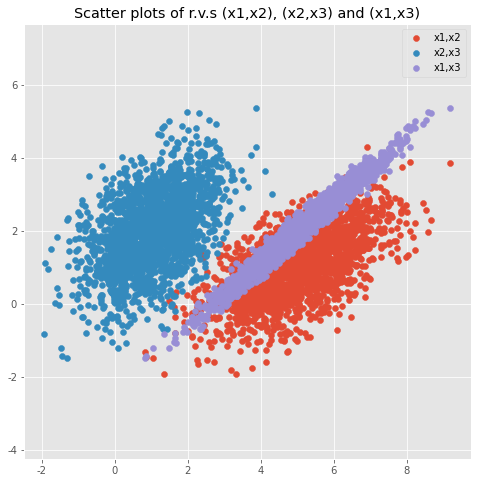

In [100]:
plt.style.use("ggplot")
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize']=(8,8)
X12 = np.vstack((x1,x2)).T
X23 = np.vstack((x2,x3)).T
X13 = np.vstack((x1,x3)).T
plt.scatter(X12[:,0],X12[:,1],label='x1,x2')
plt.scatter(X23[:,0],X23[:,1],label='x2,x3')
plt.scatter(X13[:,0],X13[:,1],label='x1,x3')
plt.title("Scatter plots of r.v.s (x1,x2), (x2,x3) and (x1,x3)")
plt.axis('equal')
plt.legend()
plt.show

In [34]:
class MultivariateNormal:
    """
    Class of multivariate normal distribution.

    Parameters
    ----------
    μ: ndarray(float, dim=1)
        the mean of z, N by 1
    Σ: ndarray(float, dim=2)
        the covarianece matrix of z, N by 1

    Arguments
    ---------
    μ, Σ:
        see parameters
    μs: list(ndarray(float, dim=1))
        list of mean vectors μ1 and μ2 in order
    Σs: list(list(ndarray(float, dim=2)))
        2 dimensional list of covariance matrices
        Σ11, Σ12, Σ21, Σ22 in order
    βs: list(ndarray(float, dim=1))
        list of regression coefficients β1 and β2 in order
    """

    def __init__(self, μ, Σ):
        "initialization"
        self.μ = np.array(μ)
        self.Σ = np.atleast_2d(Σ)

    def partition(self, k):
        """
        Given k, partition the random vector z into a size k vector z1
        and a size N-k vector z2. Partition the mean vector μ into
        μ1 and μ2, and the covariance matrix Σ into Σ11, Σ12, Σ21, Σ22
        correspondingly. Compute the regression coefficients β1 and β2
        using the partitioned arrays.
        """
        μ = self.μ
        Σ = self.Σ

        self.μs = [μ[:k], μ[k:]]
        self.Σs = [[Σ[:k, :k], Σ[:k, k:]],
                   [Σ[k:, :k], Σ[k:, k:]]]

        self.βs = [self.Σs[0][1] @ np.linalg.inv(self.Σs[1][1]),
                   self.Σs[1][0] @ np.linalg.inv(self.Σs[0][0])]

    def cond_dist(self, ind, z):
        """
        Compute the conditional distribution of z1 given z2, or reversely.
        Argument ind determines whether we compute the conditional
        distribution of z1 (ind=0) or z2 (ind=1).

        Returns
        ---------
        μ_hat: ndarray(float, ndim=1)
            The conditional mean of z1 or z2.
        Σ_hat: ndarray(float, ndim=2)
            The conditional covariance matrix of z1 or z2.
        """
        β = self.βs[ind]
        μs = self.μs
        Σs = self.Σs

        μ_hat = μs[ind] + β @ (z - μs[1-ind])
        Σ_hat = Σs[ind][ind] - β @ Σs[1-ind][1-ind] @ β.T

        return μ_hat, Σ_hat

In [40]:
k = 1
multi_normal.partition(k)

In [41]:
ind = 0
z2 = np.array([2., 5.])

μ1_hat, Σ1_hat = multi_normal.cond_dist(ind, z2)

In [42]:
n = 2000
data = np.random.multivariate_normal(mu3, cov3, size=n)
z1_data = data[:, :k]
z2_data = data[:, k:]

In [43]:
μ1, μ2 = multi_normal.μs
results = sm.OLS(z1_data - μ1, z2_data - μ2).fit()

In [44]:
multi_normal.βs[0], results.params


(array([[0.24351701, 1.12643918]]), array([0.22703765, 1.14483481]))

In [45]:
Σ1_hat, results.resid @ results.resid.T / (n - 1)

(array([[0.07544242]]), 0.07378335869479272)

In [46]:
μ1_hat, results.predict(z2 - μ2) + μ1

(array([8.62283455]), array([8.66154208]))

In [51]:
# x = np.linspace(0, 5, 10)
# mean = np.array([5,1,2])
# cov = np.array([[20,11,-2], [11,2,8],[-2,8,7]])
# mvn3 = multivariate_normal(x,mean,cov)

In [52]:
# d = 3
# mean = np.matrix([5,1,2])
# cov = np.matrix([[20,11,-2], [11,2,8],[-2,8,7]])
# # eval = np.linalg.eigvals(cov)
# L = linalg.cholesky(cov)
# n = 50  # Samples to draw
# X = np.random.normal(size=(d, n))
# # Apply the transformation
# Y = L.dot(X) + mean
# eval = np.linalg.eigvals(cov)
# eval